In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
import os
from modules.TravelSurveyAnalysis import TravelSurveyAnalysis

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'netherlands/'
destination_folder_path = data_folder + 'netherlands/'

In [2]:
expansion_factor_trip = 'FactorV'
expansion_factor_person = 'FactorP'
origin_column = 'VertGem'
destination_column = 'AankGem'

tsa = TravelSurveyAnalysis(source_folder_path, destination_folder_path,
                           expansion_factor_trip, expansion_factor_person,
                           origin_column, destination_column)

In [3]:
filename = 'ODiN2018_Databestand_v2.0.csv'
data = tsa.read_data(filename)

In [4]:
data

,Unnamed: 0,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV
0,0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759
1,1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759
2,2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759
3,3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,

In [5]:
data[expansion_factor_trip].sum()

19086359370

It's not possible to sum up all the expansion factor to obtain the total esstimate of the trips in the netherlands. It's simply a weight. Maybe we would have to normalize the weights based on an external estimation of the total trips to be able to say that.

### Important columns

KHvm - Principal modo de movimento da classe de transporte

- missing if no movement
- 1: Passenger car - driver
- 2: Passenger car - passenger
- 3: Train
- 4: Bus/tram/metro
- 5: Bicycle
- 6: On foot
- 7: Other


Geslacht - Gender

- 1: Man
- 2: Woman

Leeftijd - Idade

HHBestInkG - Renda disponível das famílias (grupos de 10%)

HHGestInkG - Renda disponível familiar padronizada (grupos de 10%)

RReisduur - Duração da viagem na Holanda (em minutos)

RReisduurBL - Tempo de viagem ao exterior (em minutos)

In [6]:
mode_column = 'KHvm'
mode_index_map = {'1': 'Passenger car - driver', '2': 'Passenger car - passenger', '3': 'Train', '4': 'Bus/tram/metro', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
df = tsa.calculate_distribution(data, mode_column, expansion_factor_trip, mode_index_map)
df

,FactorV
KHvm_new,
Bicycle,26.122166
Bus/tram/metro,5.247778
On foot,14.697099
Other,3.922284
Passenger car - driver,31.762581
Passenger car - passenger,10.894304
Train,7.353789


In [7]:
mode_column = 'KHvm'
# reduced_mode_index_map = {'1': 'Personal motorized', '2': 'Personal motorized', '3': 'Collective motorized', '4': 'Collective motorized', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
reduced_mode_index_map = {'1': 'Personal motorized', '2': 'Personal motorized', '3': 'Collective motorized', '4': 'Collective motorized', '5': 'Bicycle', '6': 'On foot', '7': 'Personal motorized'}
df = tsa.calculate_distribution(data, mode_column, expansion_factor_trip, reduced_mode_index_map)
df

,FactorV
KHvm_new,
Bicycle,26.122166
Collective motorized,12.601567
On foot,14.697099
Personal motorized,46.579169


In [8]:
detailed_mode_column = 'Hvm'
df = tsa.calculate_distribution(data, detailed_mode_column, expansion_factor = False)
df

,Hvm
1,40.617093
8,22.708694
9,13.252543
2,7.765394
#NULL!,4.158514
7,3.412758
3,2.827831
11,1.395220
5,1.178049
4,0.855366


In [9]:
# with trip expansion factor
gender_column = 'Geslacht'
gender_index_map = {1: 'Man', 2: 'Woman'}
df = tsa.calculate_distribution(data, gender_column, expansion_factor_trip, gender_index_map)
df

,FactorV
Geslacht_new,
Man,47.895491
Woman,52.104509


In [10]:
# with person expansion factor
df = tsa.calculate_distribution(data, gender_column, expansion_factor_person, gender_index_map)
df

,FactorP
Geslacht_new,
Man,47.895662
Woman,52.104338


In [11]:
bike_trips = tsa.get_specific_mode_trips(data, mode_column, ['5'])
bike_trips

,Unnamed: 0,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new
2,2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man
3,3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man
7,7,1,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037201,1,0,1,2,1,1,3,12,1,0,9785.0,1.0,5,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,80,7,8,4,5,7,45,3,8,10,25,6,230,0,2,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720101,1,80,0,7,8,4,11,5,7,45,8,10,25,0,0.0,0.0,13,0,0,115,229,83598,Bicycle,Man
10,10,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037204,4,0,1,1,3,2,3,12,3,0,9743.0,1.0,14,1,3,18,0,9785.0,1.0,5,1,3,18,0.0,0,0.0,100,8,8,4,5,18,0,11,18,45,45,8,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NU

In [12]:
tsa.calculate_distribution(bike_trips, gender_column, expansion_factor_person, gender_index_map)

,FactorP
Geslacht_new,
Man,44.958221
Woman,55.041779


In [13]:
tsa.calculate_distribution(bike_trips, gender_column, expansion_factor_trip, gender_index_map)

,FactorV
Geslacht_new,
Man,44.957707
Woman,55.042293


## Age

In [14]:
age_column = 'Leeftijd'

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


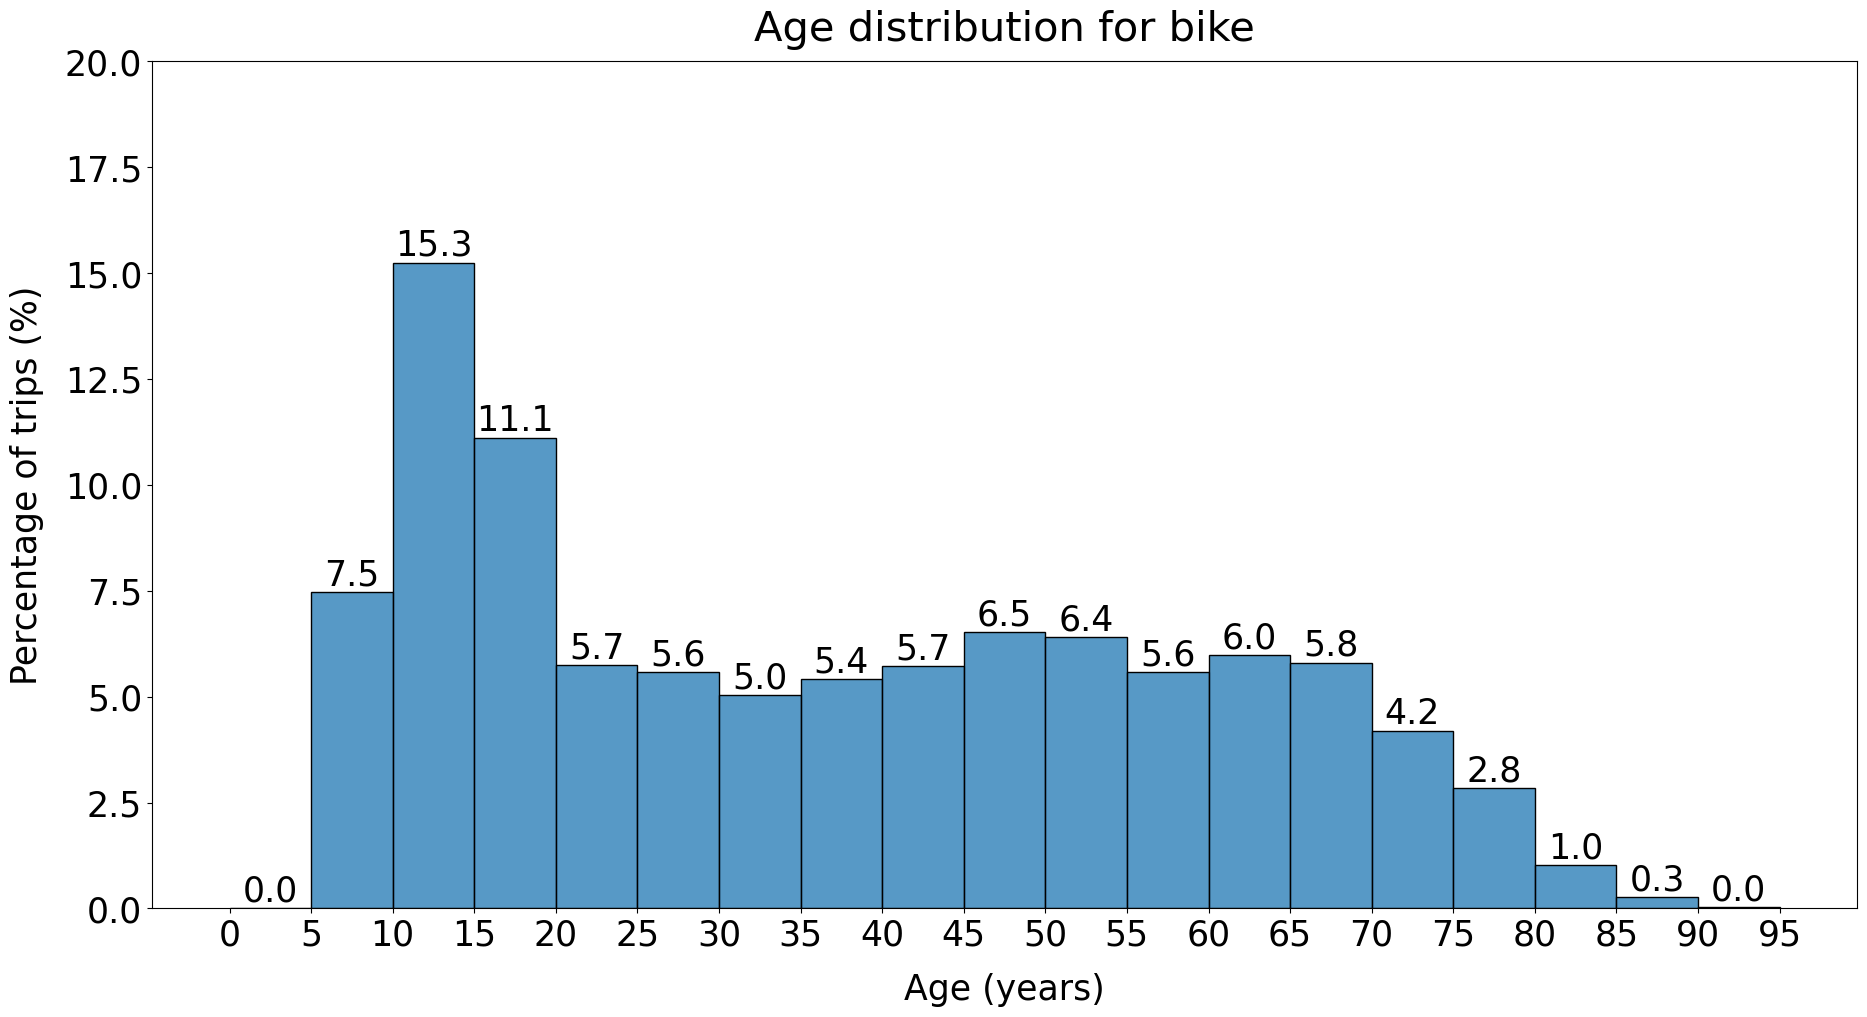

In [15]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = False, 
                       list_bins = list_bins, mode = 'bike', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


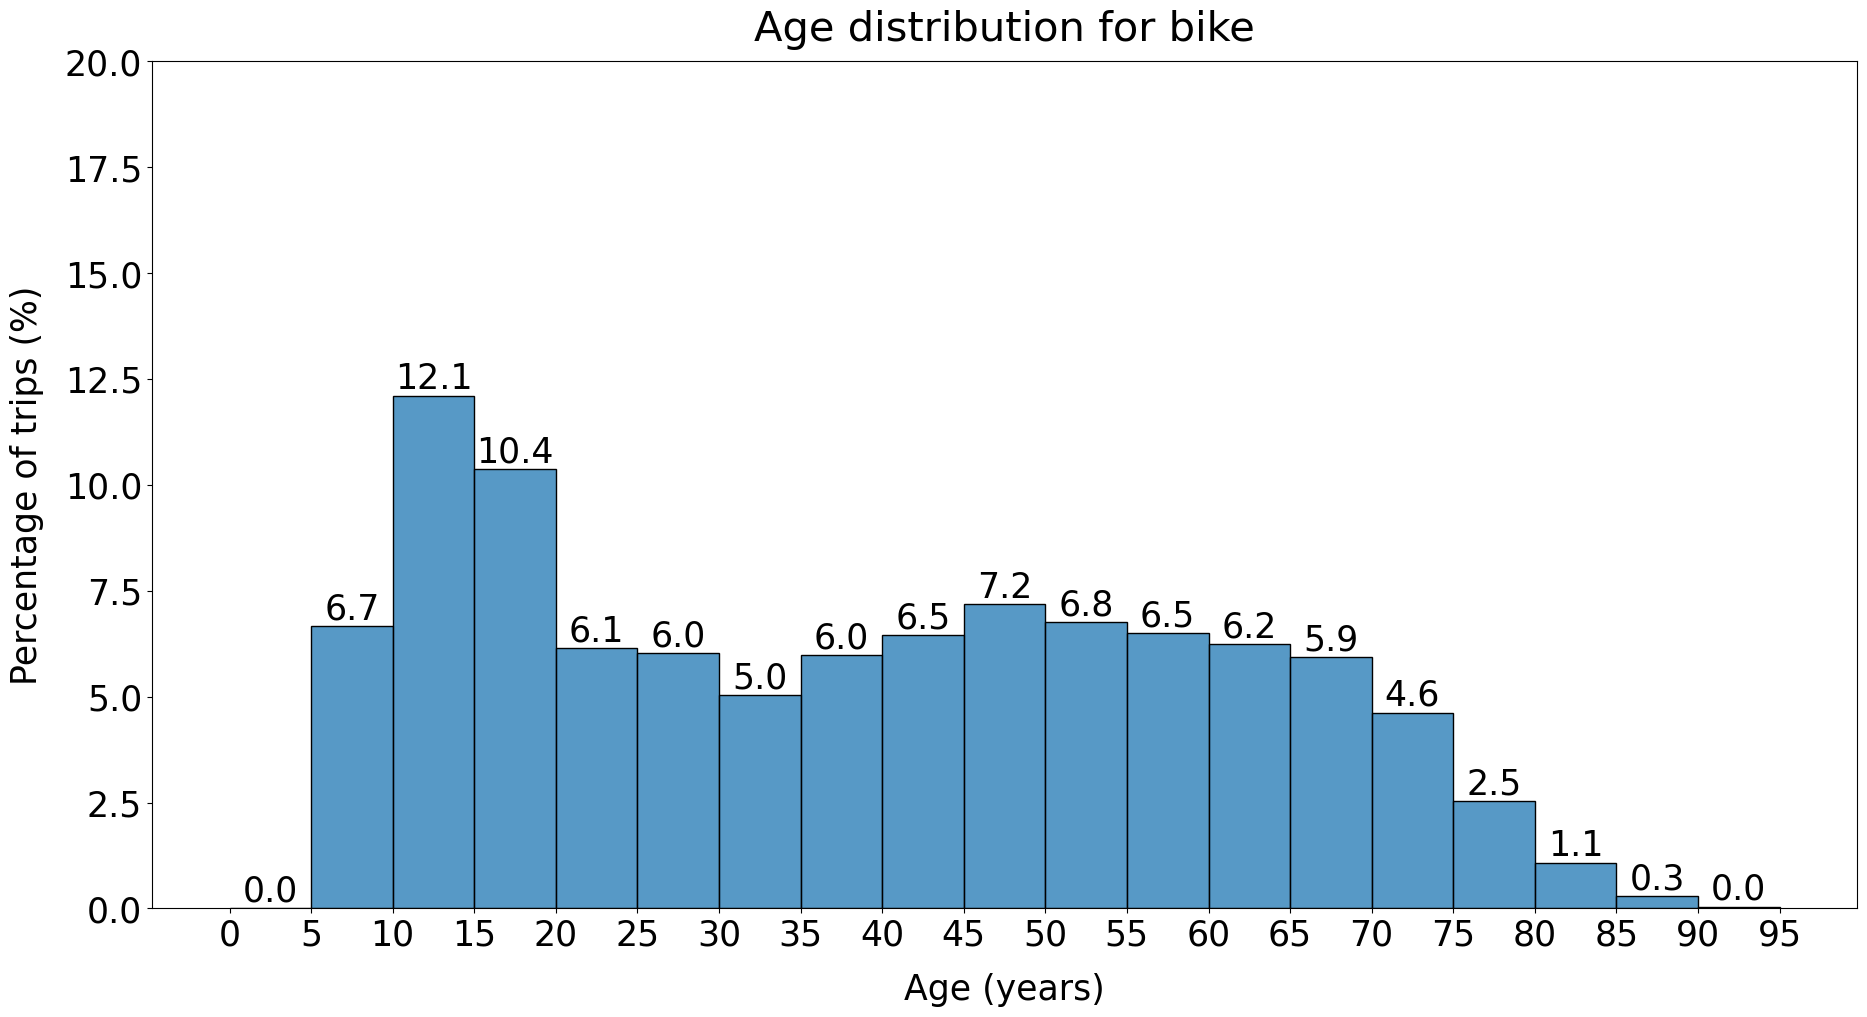

In [16]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = expansion_factor_trip, 
                       list_bins = list_bins, mode = 'bike', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


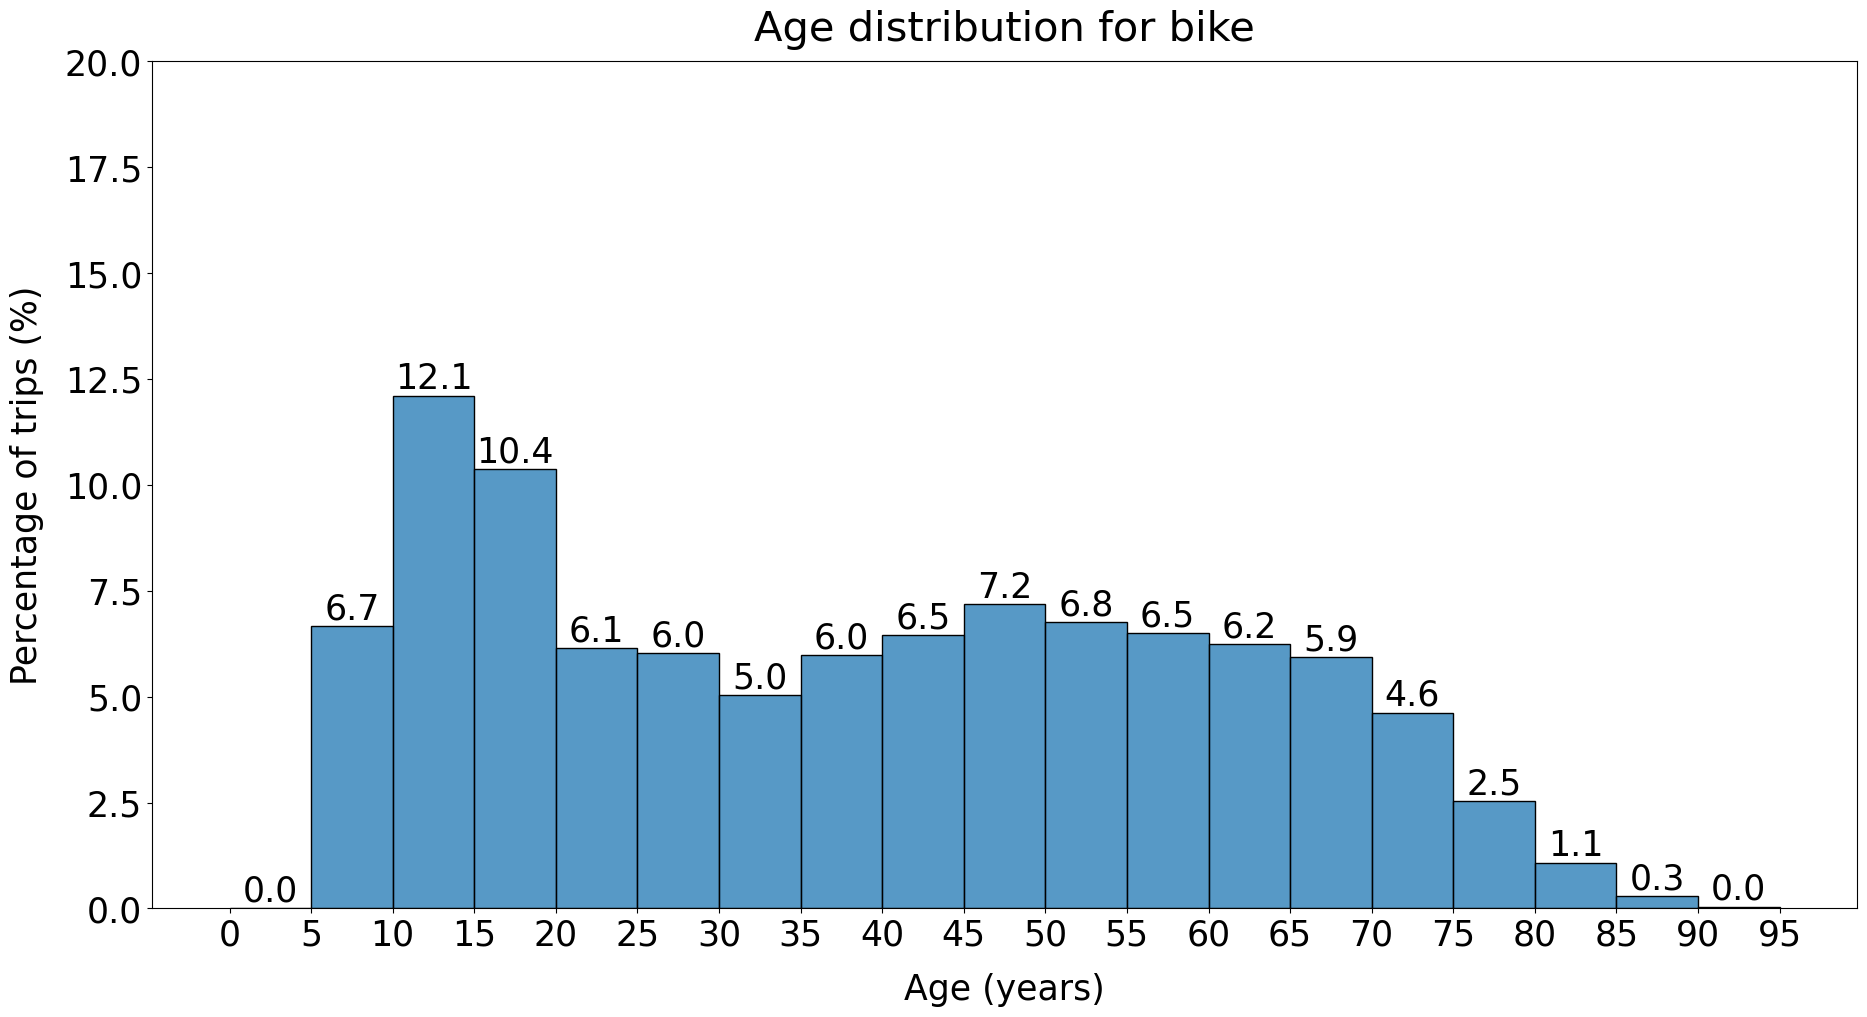

In [17]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'bike', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


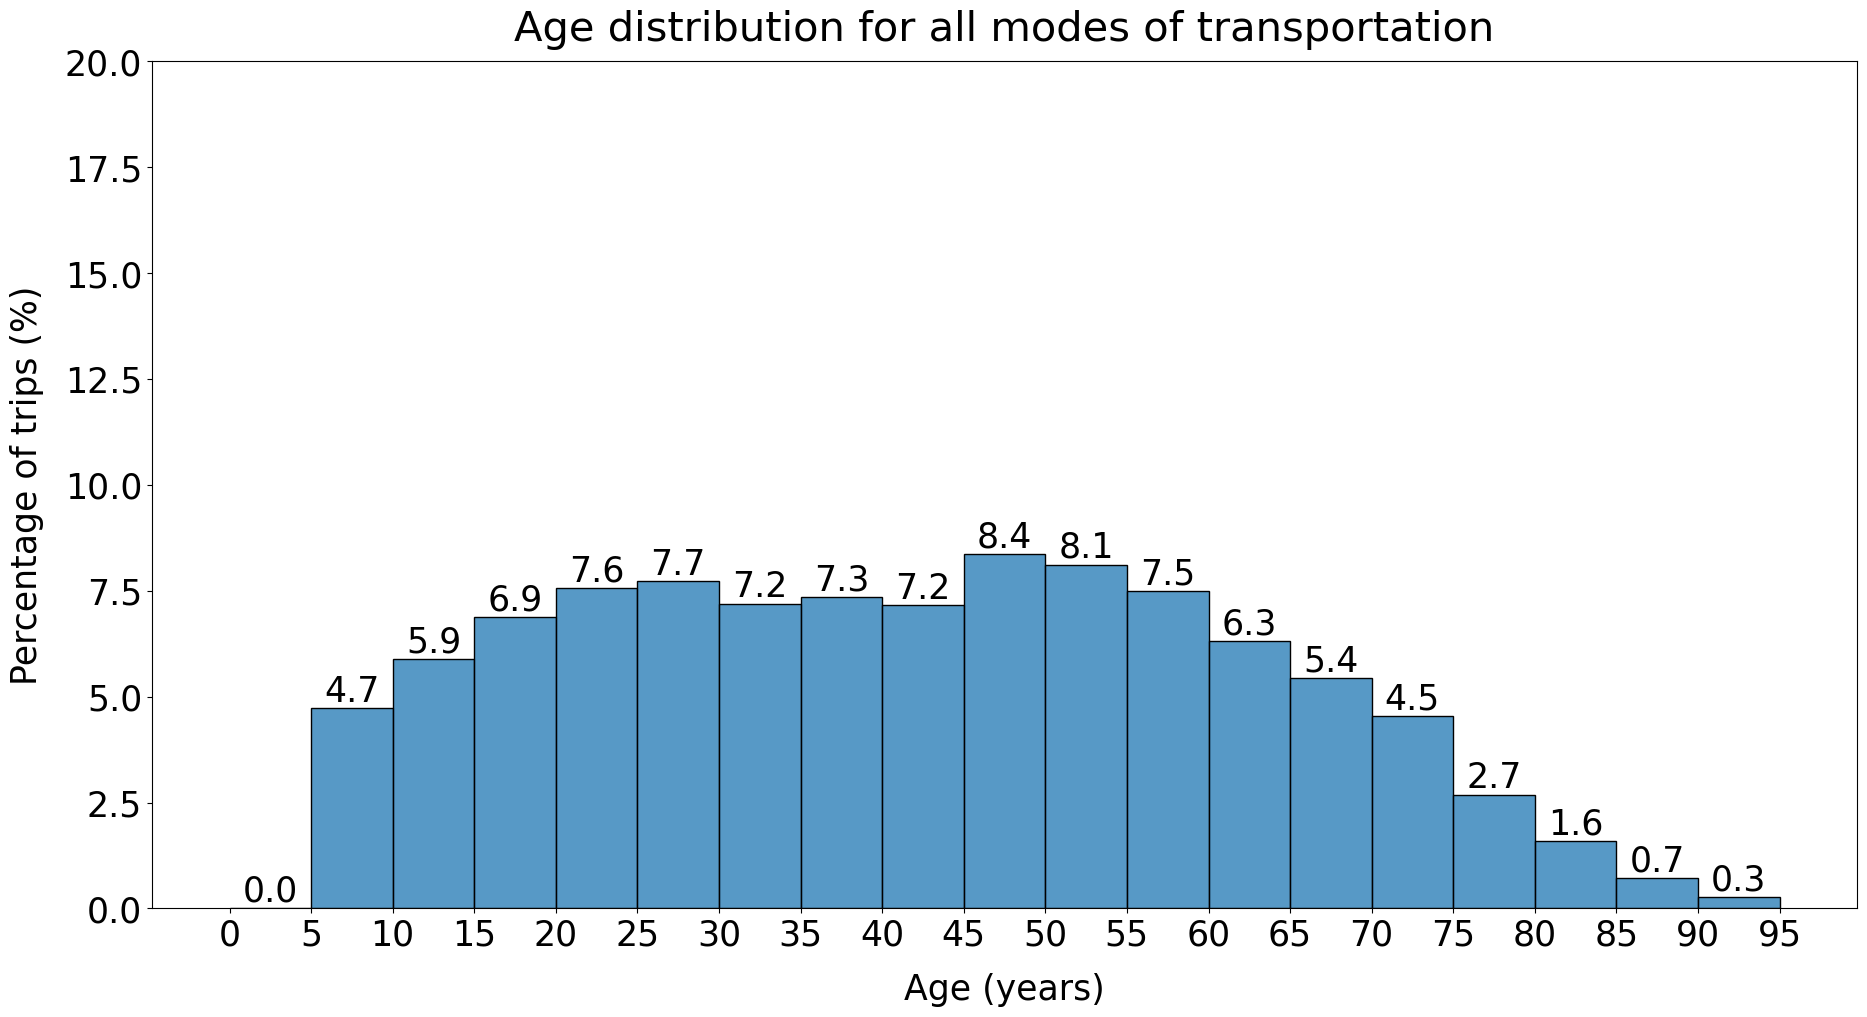

In [18]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(data, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'all modes of transportation', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


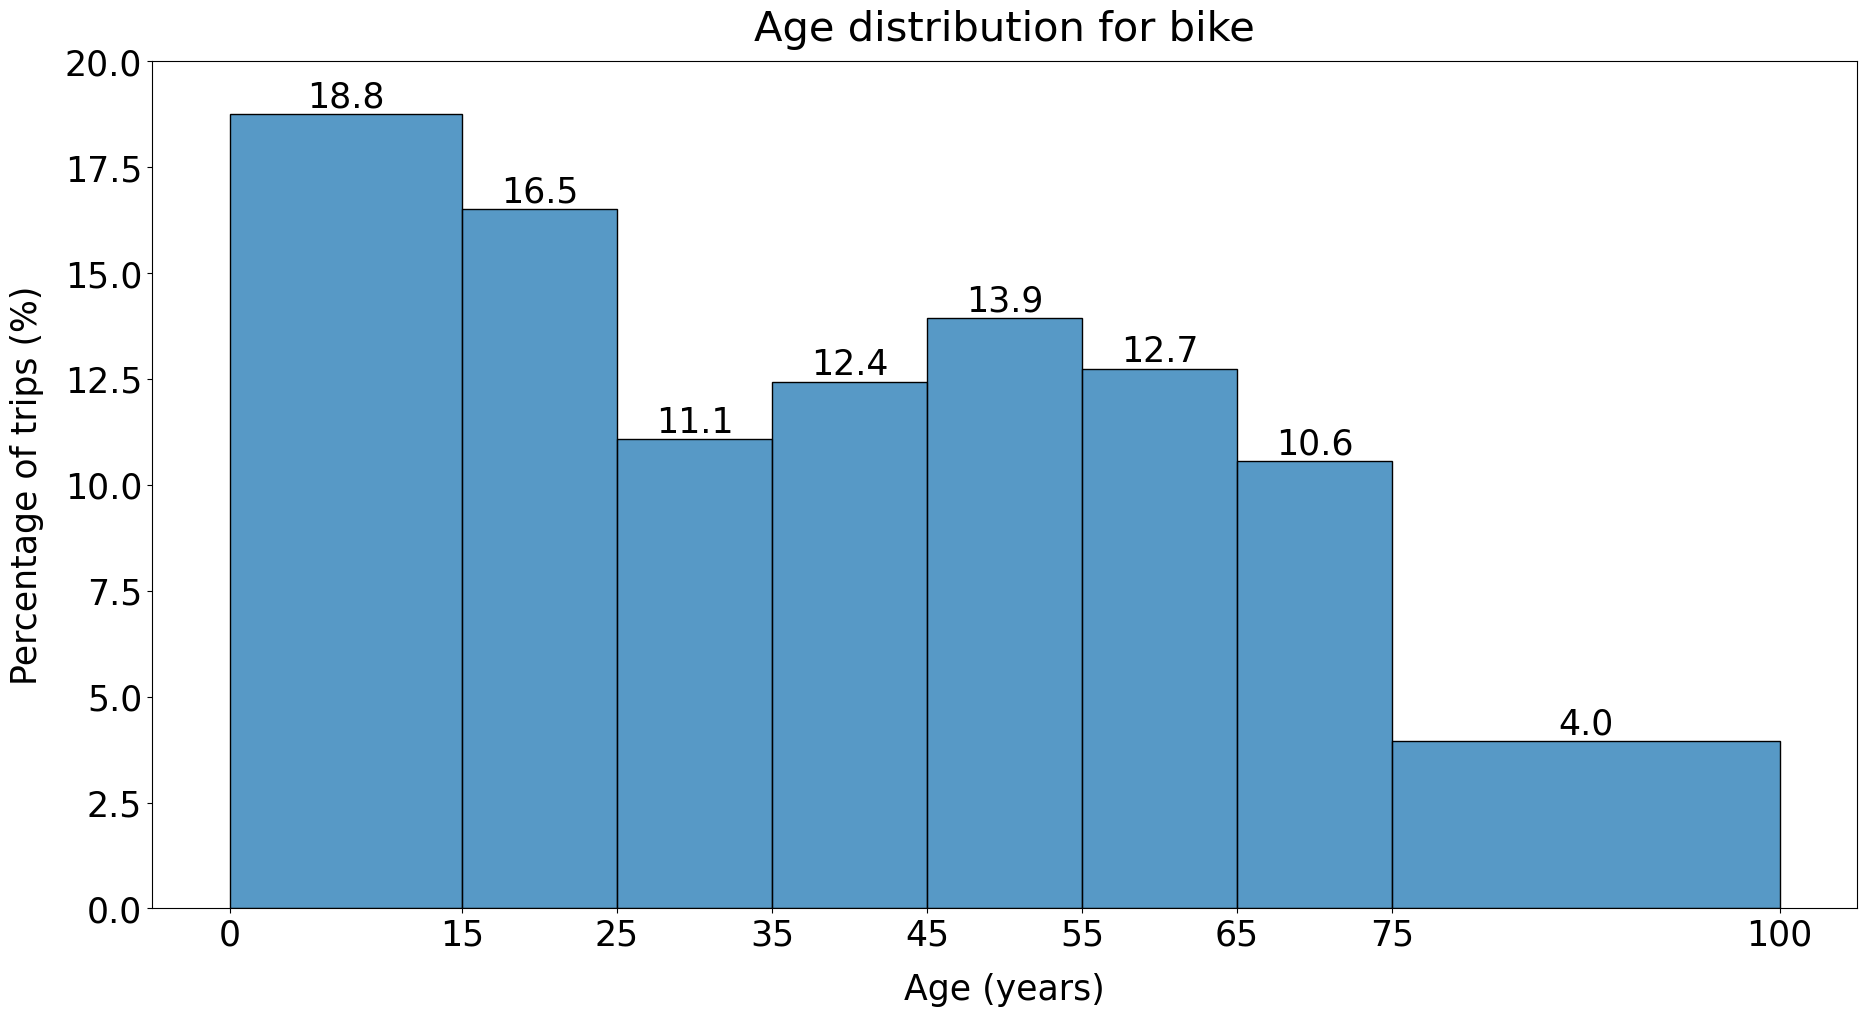

In [19]:
list_bins = [0,15,25,35,45,55,65,75,100]
tsa.plot_histogram_age(bike_trips, variable_column = age_column,
                       expansion_factor = expansion_factor_person,
                       list_bins = list_bins, mode = 'bike', save=False)

In [20]:
public_trips = tsa.get_specific_mode_trips(data, mode_column, ['3', '4'])
individual_trips = tsa.get_specific_mode_trips(data, mode_column, ['1', '2'])
walk_trips = tsa.get_specific_mode_trips(data, mode_column, ['6'])

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


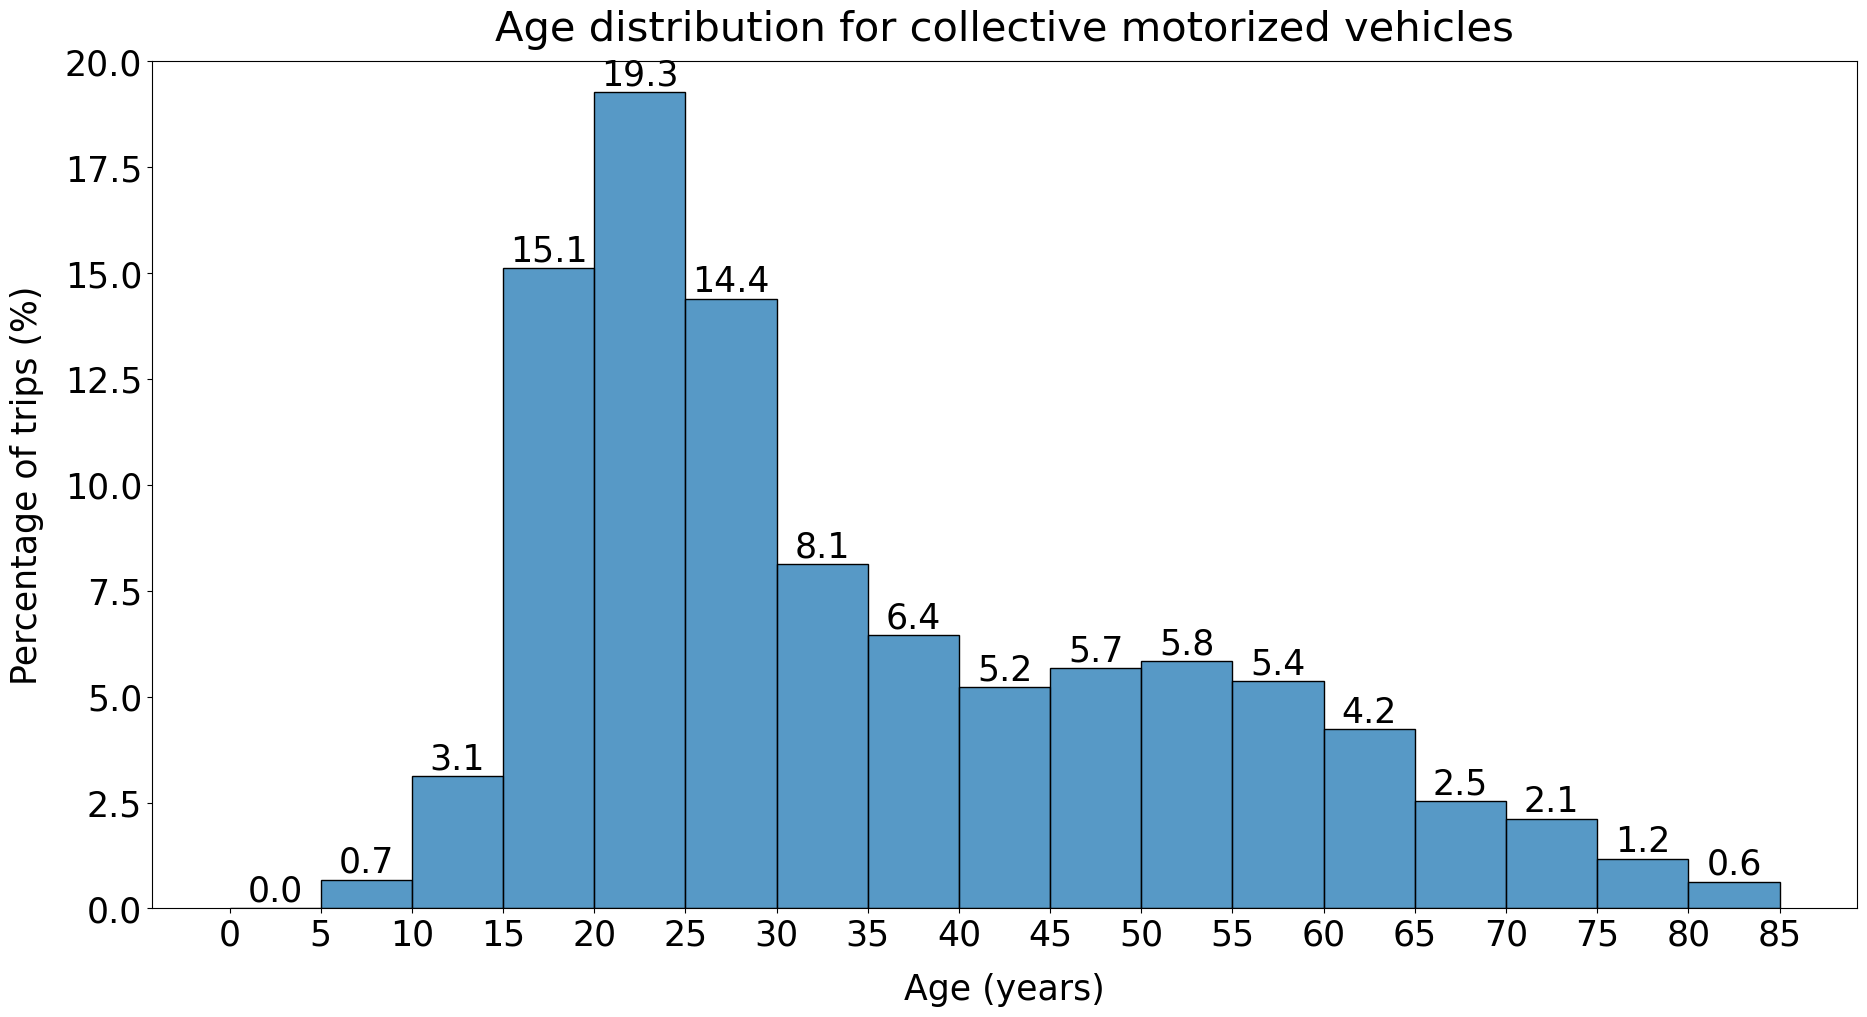

In [21]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(public_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'collective motorized vehicles', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


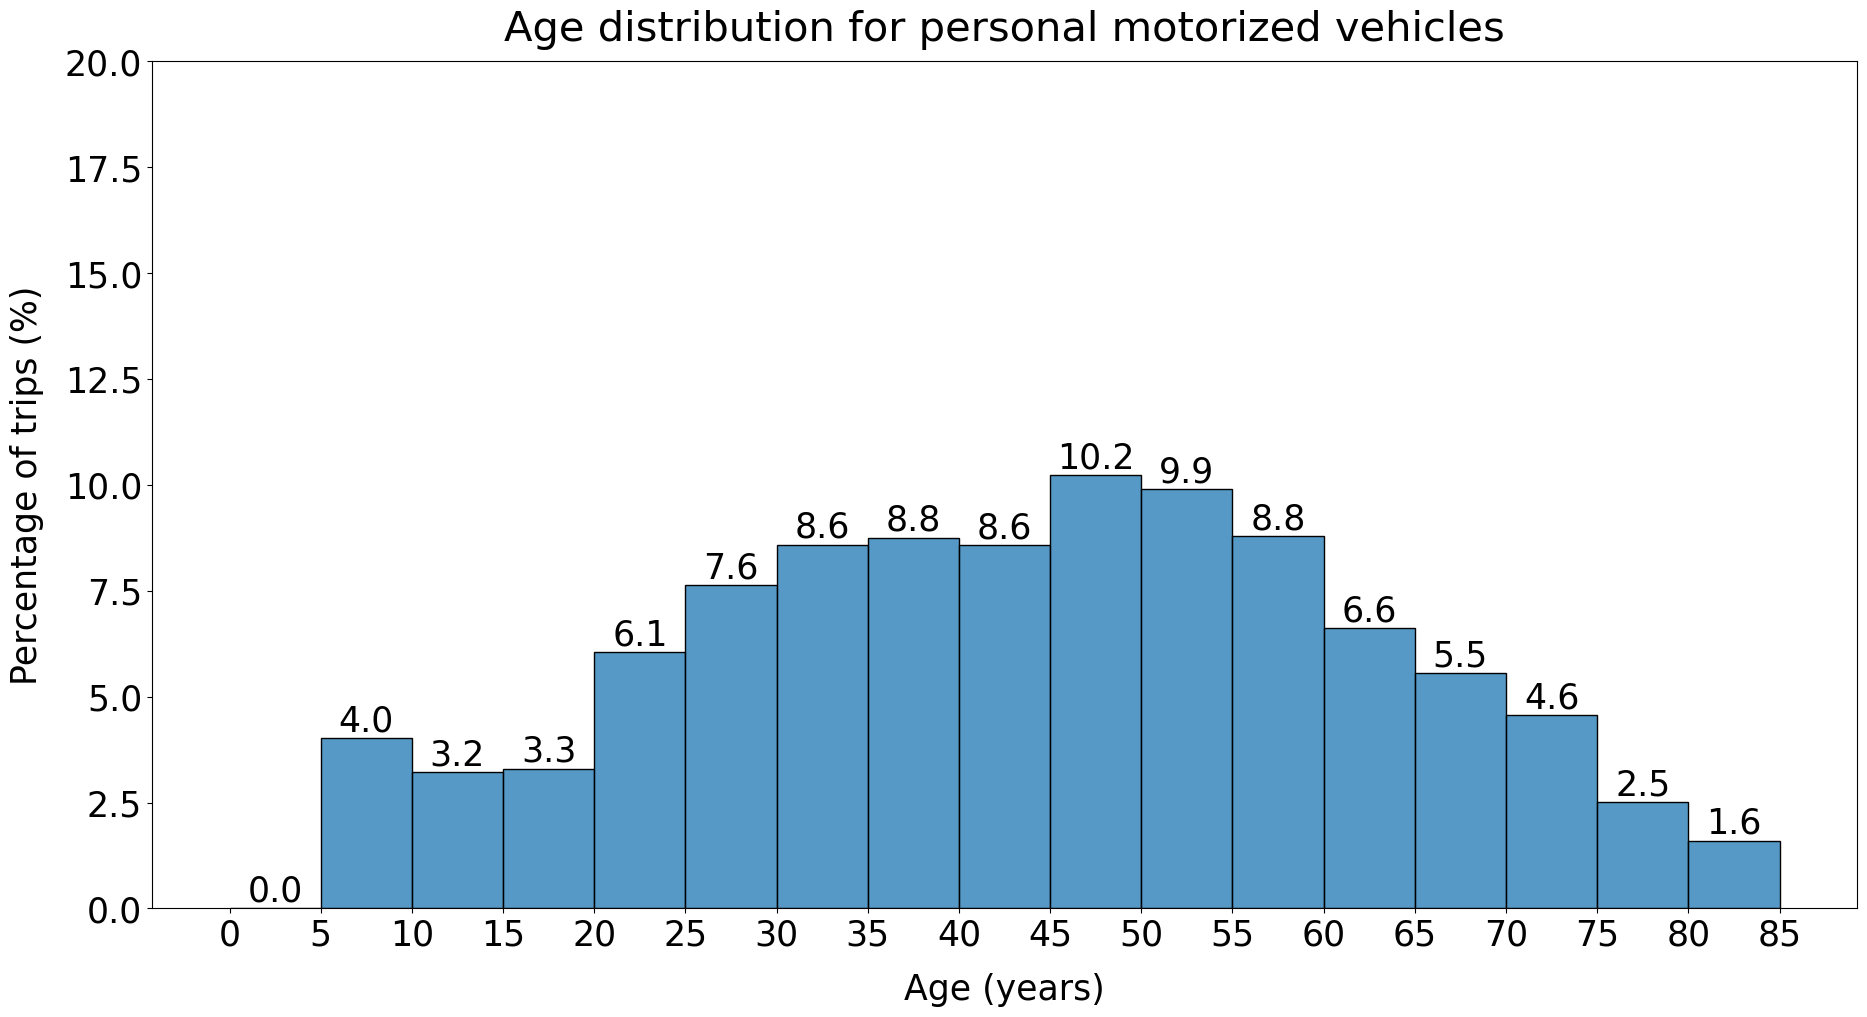

In [22]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(individual_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'personal motorized vehicles', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


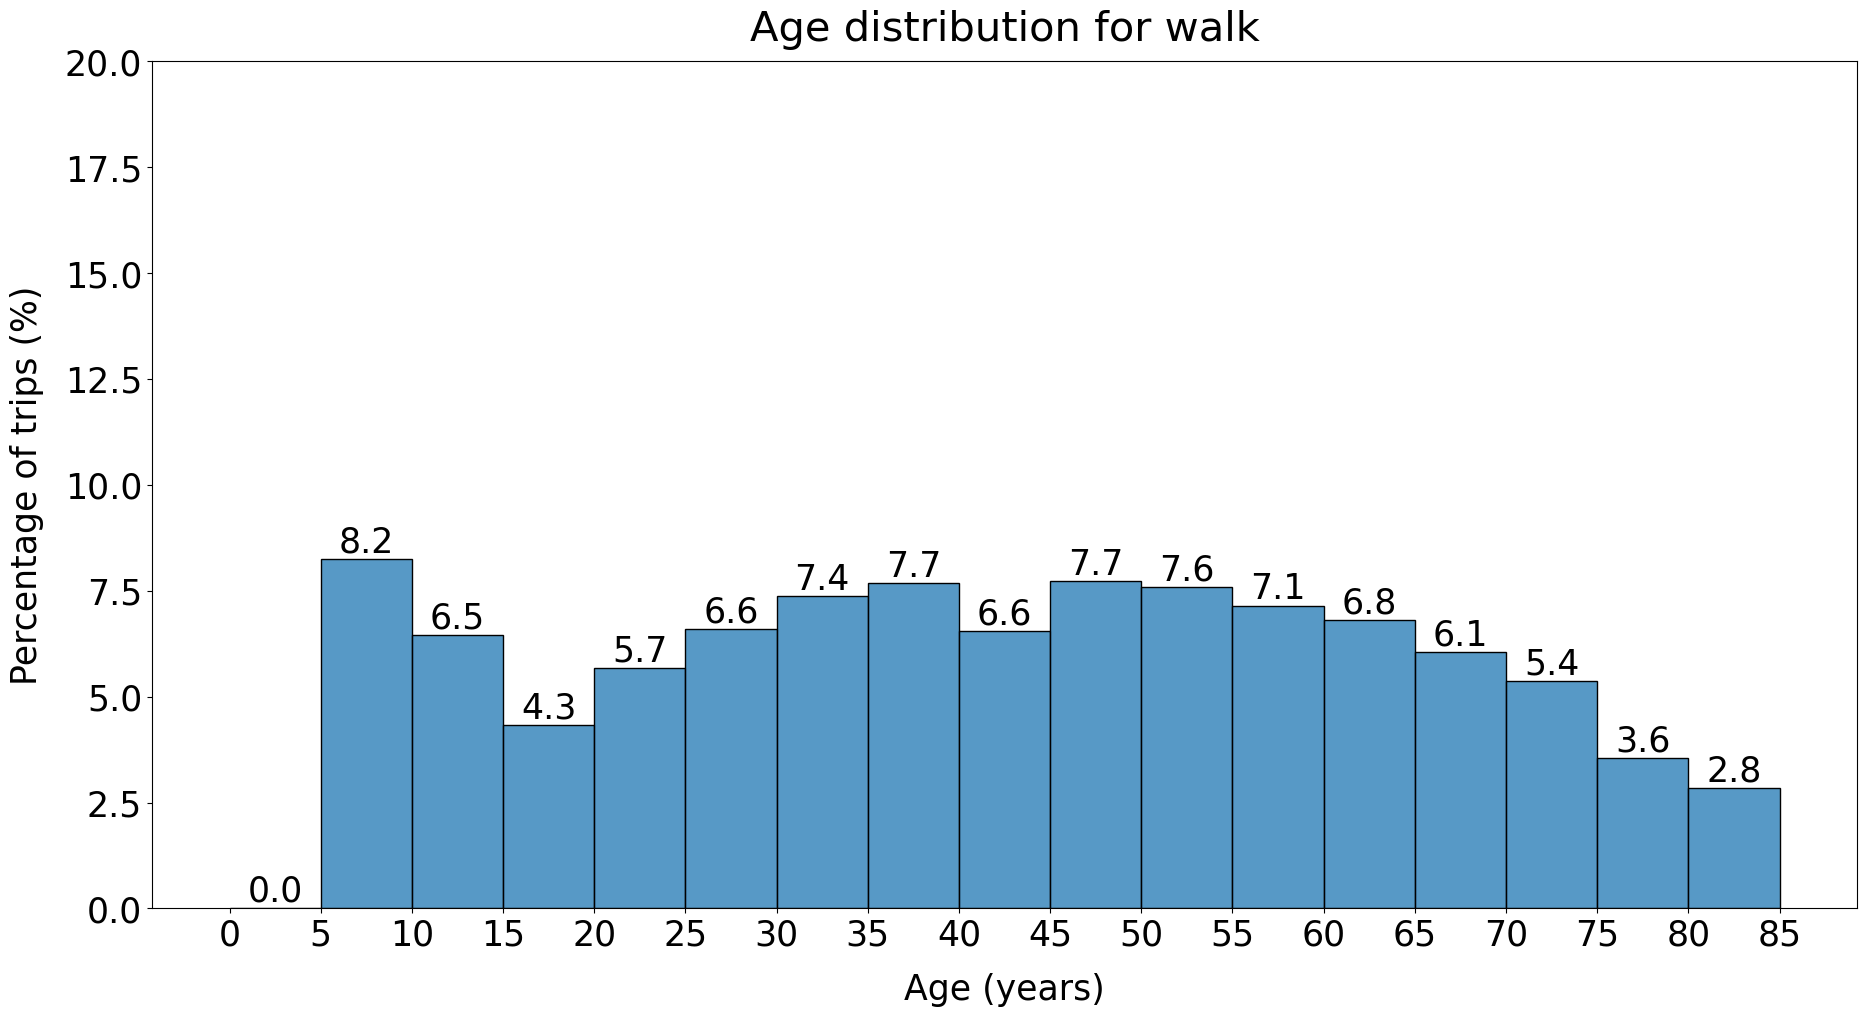

In [23]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(walk_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'walk', save=True)

## Social class

columns:
- HHBestInkG - Renda disponível das famílias (grupos de 10%)

- HHGestInkG - Renda disponível familiar padronizada (grupos de 10%)

In [24]:
data['HHBestInkG'].unique()

array([ 8,  3, 10,  5,  6,  1,  2,  7,  9, 11,  4])

In [25]:
social_class_column = 'HHGestInkG'
classes_index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'D-E', 11:None}
tsa.calculate_distribution(data, social_class_column, expansion_factor_person, classes_index_map)

,FactorP
HHGestInkG_new,
A,7.131023
B1,14.182218
B2,29.754416
C1,23.716724
C2,12.750302
D-E,12.465316


In [26]:
social_class_column = 'HHBestInkG'
classes_index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'D-E', 11: None}
tsa.calculate_distribution(data, social_class_column, expansion_factor_person, classes_index_map)

,FactorP
HHBestInkG_new,
A,5.388668
B1,10.202543
B2,26.016525
C1,25.923638
C2,15.765187
D-E,16.703439


In [27]:
social_class_column = 'HHBestInkG'
classes_index_map = {1: 'A', 2: 'A', 3: 'B1', 4: 'B1', 5: 'B2', 6: 'B2', 7: 'B2', 8: 'C1', 9: 'C2', 10: 'D-E', 11:None}
tsa.calculate_distribution(data, social_class_column, expansion_factor_person, classes_index_map)

,FactorP
HHBestInkG_new,
A,9.658956
B1,13.344149
B2,30.337541
C1,14.190728
C2,15.765187
D-E,16.703439


In [28]:
social_class_column = 'HHBestInkG'
classes_index_map = {1: 'A', 2: 'A', 3: 'B1', 4: 'B1', 5: 'B2', 6: 'B2', 7: 'B2', 8: 'C1', 9: 'C1', 10: 'C2', 11: None, 12:'D-E'}
tsa.calculate_distribution(data, social_class_column, expansion_factor_person, classes_index_map)

,FactorP
HHBestInkG_new,
A,9.658956
B1,13.344149
B2,30.337541
C1,29.955915
C2,16.703439
D-E,0.000000


In [29]:
social_class_column = 'HHBestInkG'
tsa.calculate_distribution(data, social_class_column, expansion_factor_person)

,FactorP
HHBestInkG,
1,5.297966
2,4.198411
3,5.832403
4,7.287137
5,8.424525
6,9.866953
7,11.535421
8,13.951869
9,15.499828


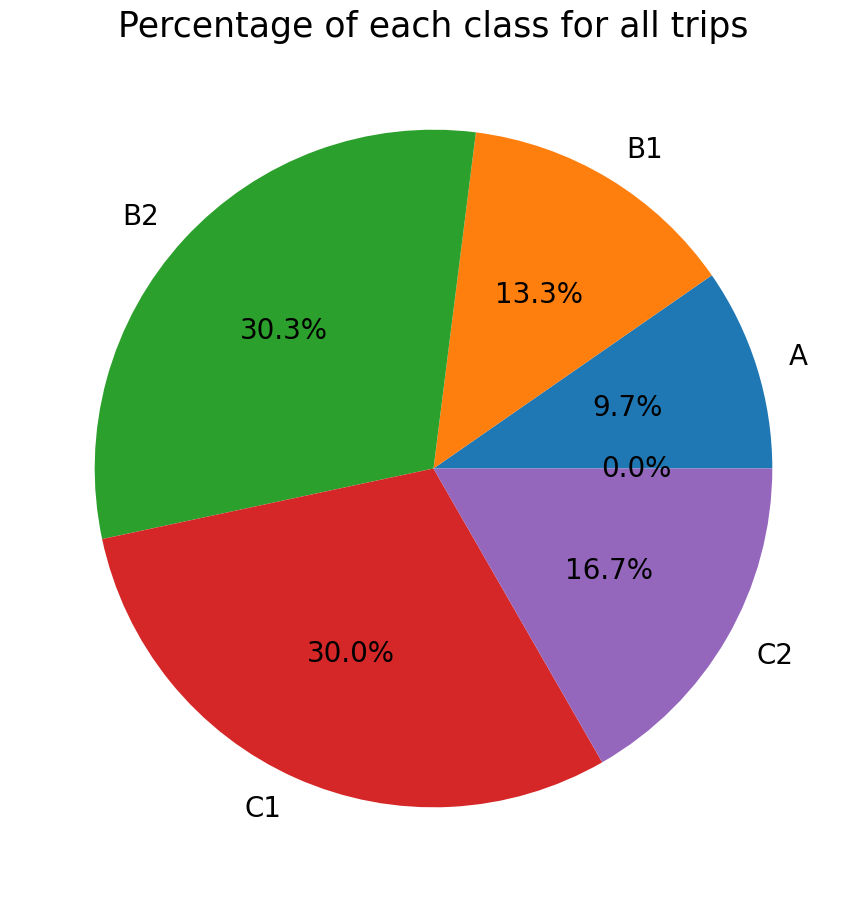

In [30]:
social_class_column = 'HHBestInkG'
tsa.plot_percentage_class(data, social_class_column, classes_index_map, save=True)

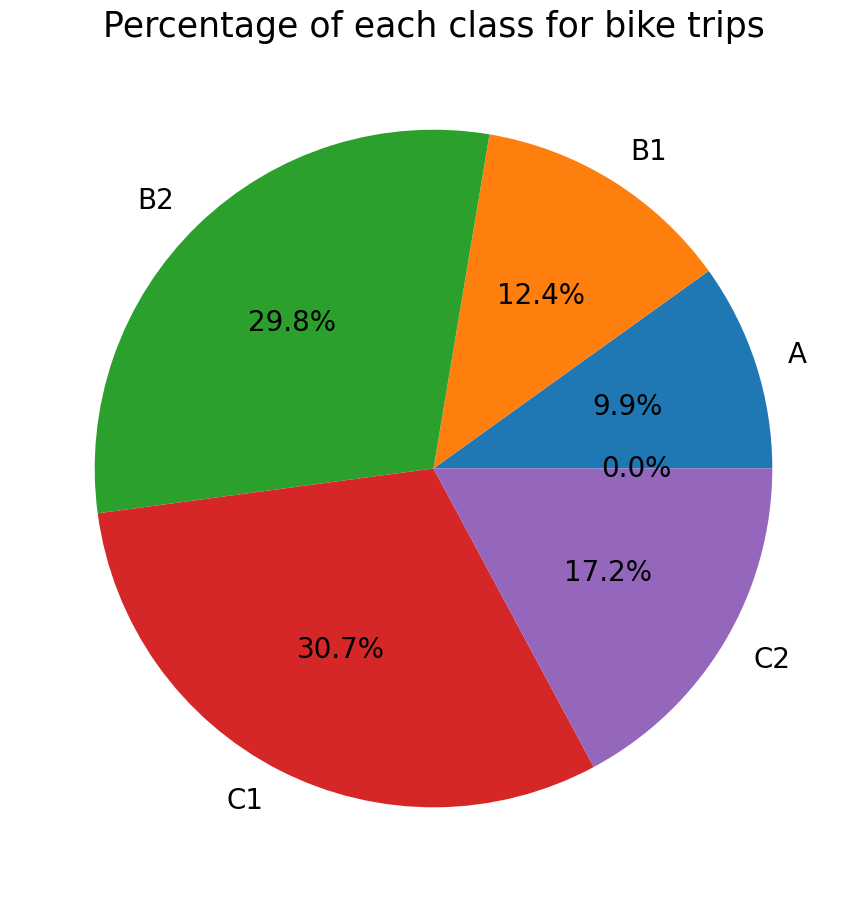

In [31]:
tsa.plot_percentage_class(bike_trips, social_class_column, classes_index_map, bike = True, save=True)

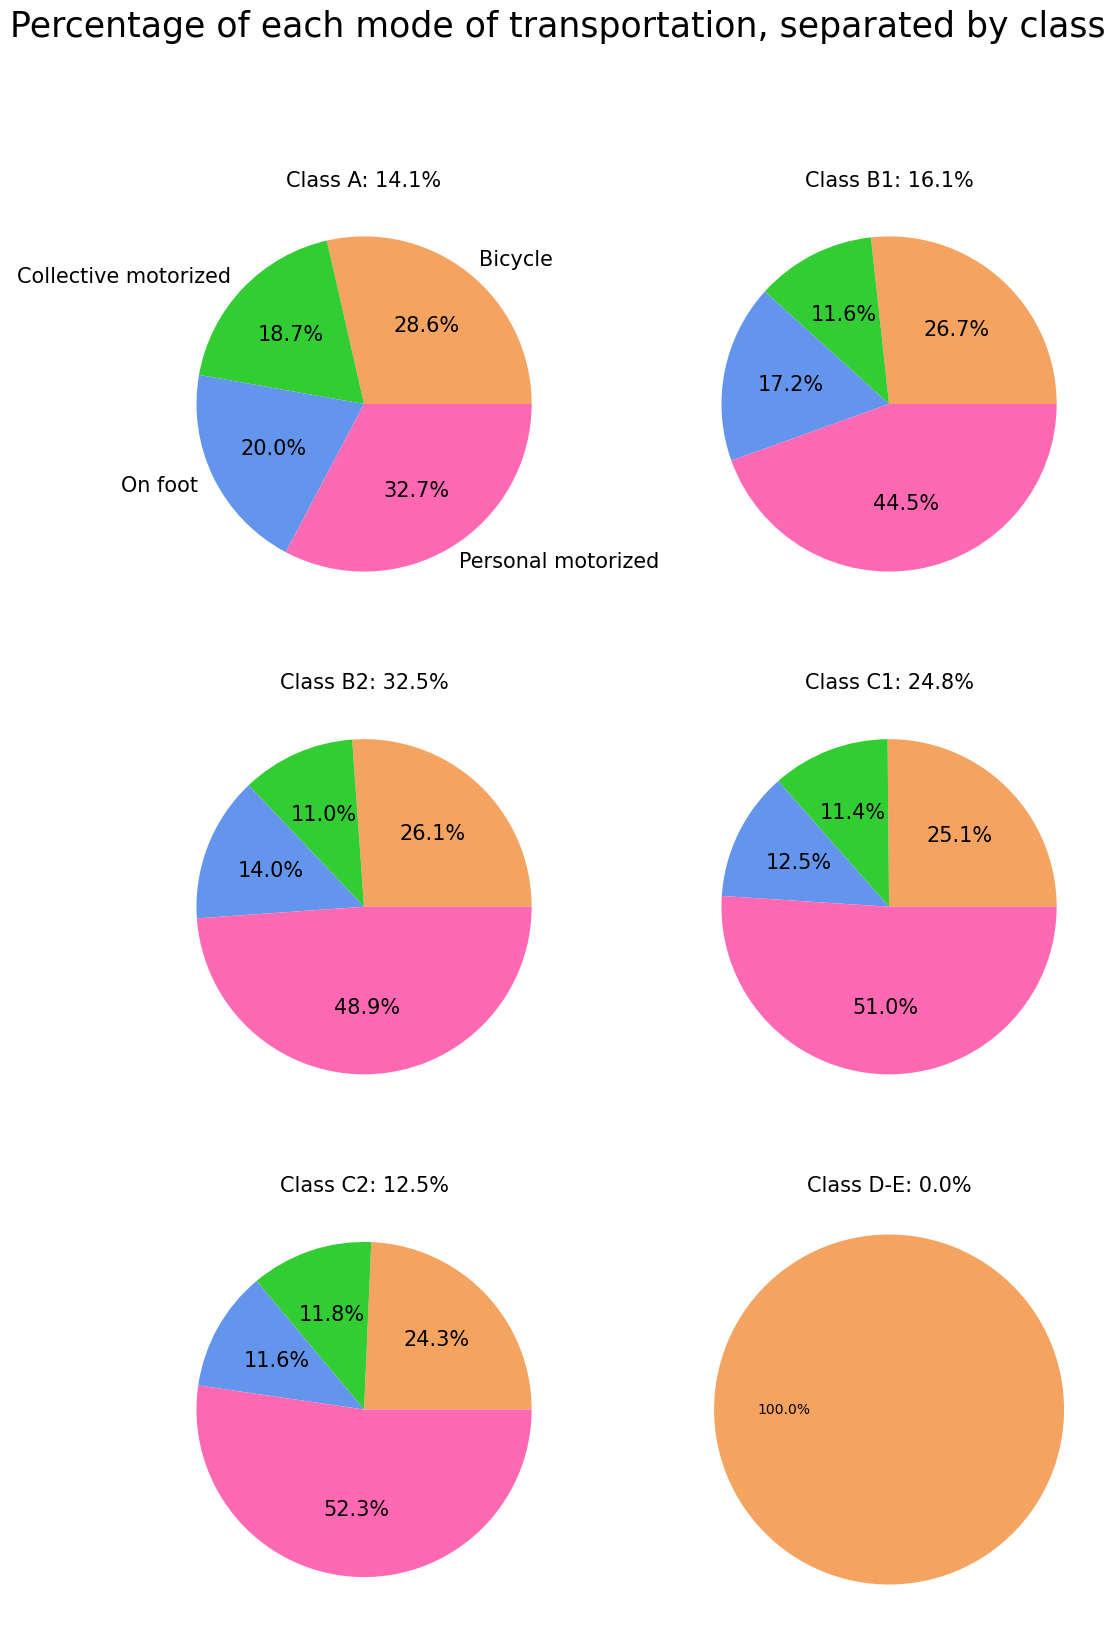

In [32]:
social_class_column = 'HHGestInkG'
tsa.plot_mode_separated_by_class(data, social_class_column, mode_column, reduced_mode_index_map, classes_index_map, save=True)

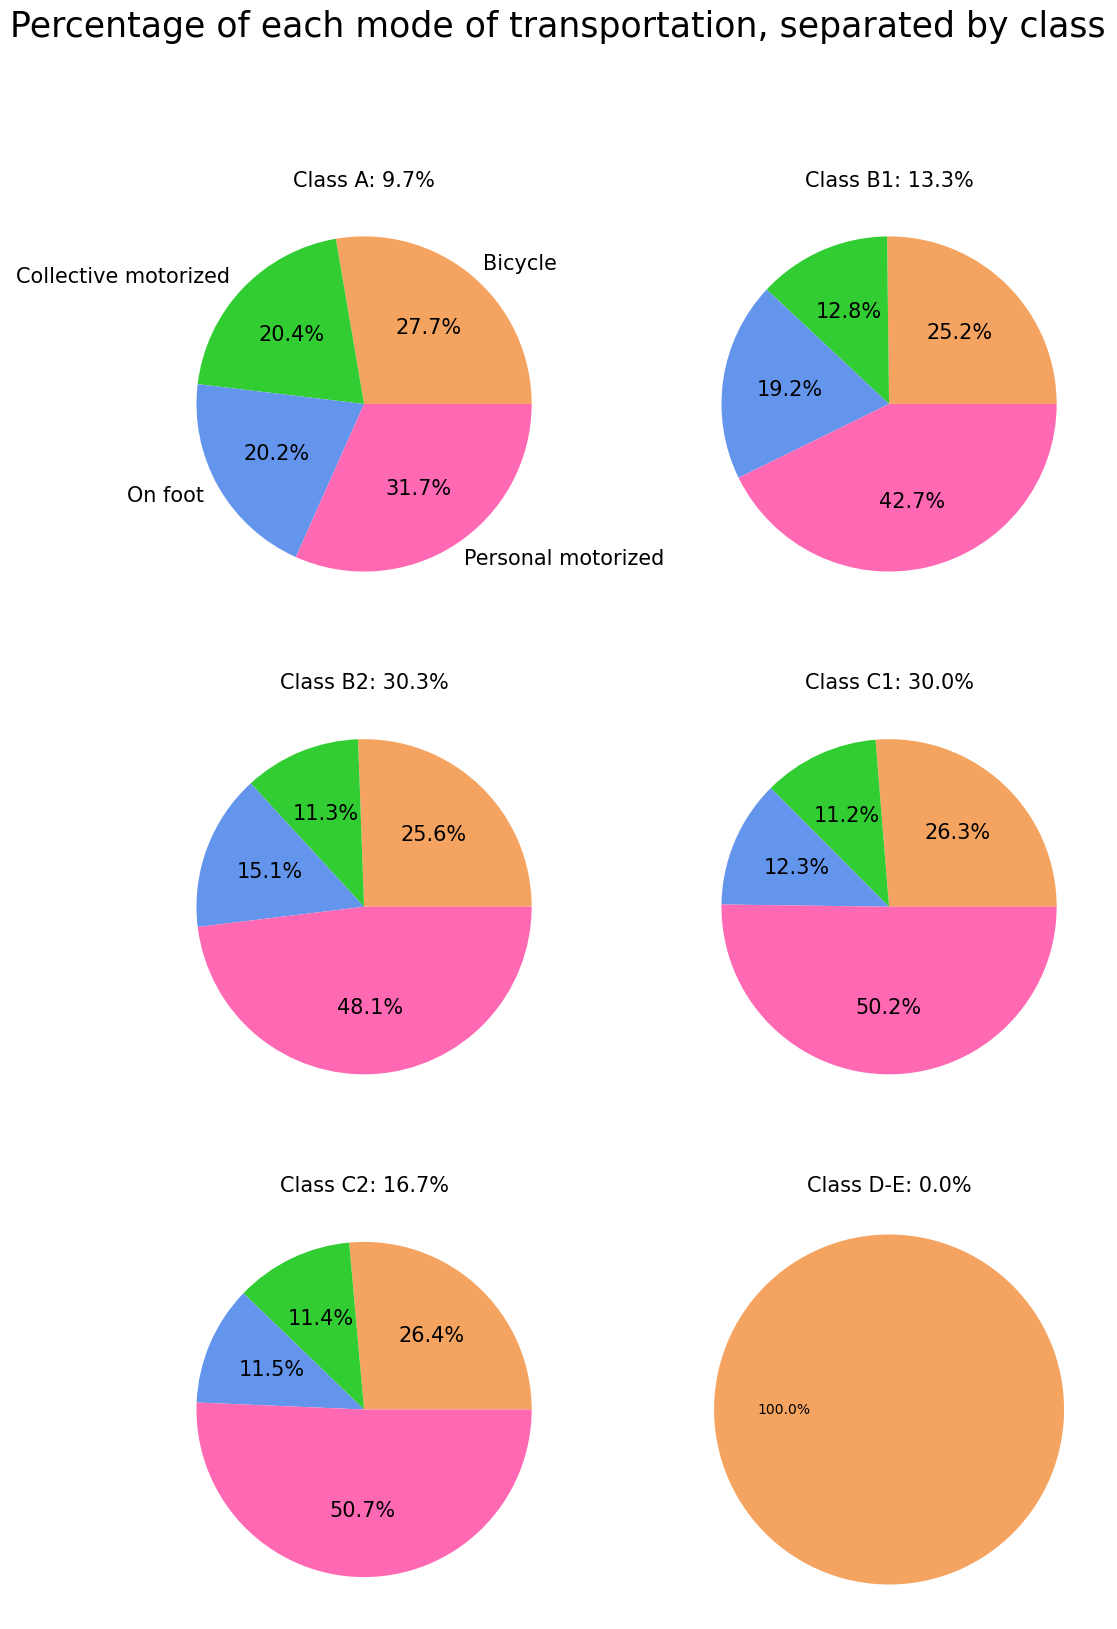

In [33]:
social_class_column = 'HHBestInkG'
tsa.plot_mode_separated_by_class(data, social_class_column, mode_column, reduced_mode_index_map, classes_index_map, save=True)

## Duration

RReisduur - Duração da viagem na Holanda (em minutos)

RReisduurBL - Tempo de viagem ao exterior (em minutos)

In [34]:
duration_column = 'RReisduur'
new_duration_column = 'Trip duration'

data = tsa.treat_duration_column(data, duration_column, new_duration_column)
data

,Unnamed: 0,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new,HHGestInkG_new,HHBestInkG_new,Trip duration
0,0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized,Man,B2,C1,15
1,1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized,Man,B2,C1,10
2,2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man,B2,C1,5
3,3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,

In [35]:
bike_trips = tsa.get_specific_mode_trips(data, mode_column, ['5'])
bike_trips

,Unnamed: 0,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new,HHGestInkG_new,HHBestInkG_new,Trip duration
2,2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man,B2,C1,5
3,3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,0,0.0,0.0,13,0,0,347,347,126759,Bicycle,Man,B2,C1,5
7,7,1,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037201,1,0,1,2,1,1,3,12,1,0,9785.0,1.0,5,1,3,18,0,9743.0,1.0,14,1,3,18,0.0,0,0.0,80,7,8,4,5,7,45,3,8,10,25,6,230,0,2,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341003720101,1,80,0,7,8,4,11,5,7,45,8,10,25,0,0.0,0.0,13,0,0,115,229,83598,Bicycle,Man,C2,C2,25
10,10,0,55834100372,1,1,2,2,3,0,0,0,2,9785,5,4,3,1,3,0,18,1,60,14,1,3,0,2,4,10,10,8,9,10,2,0,2,1,0,1,1,0,0,1,0,0,1999,1,2,2,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,0,1,5,4,3,3,3,5,4,2018,1,4,26,6,0,1,0,0,0,0,4,0,0,5,4,4,4,4,4,4,4,4,4,4,4,2,3,3,3,3,3,11,81,184,0,1,5583410037204,4,0,1,1,3,2,3,12,3,0,9743.0,1.0,14,1,3,18,0,9785.0,1.0,5,1,3,18,0.0,0,0.0,100,8,8,4,5,18,0,11,18,45,45,8,#NULL!,0,9,#NU

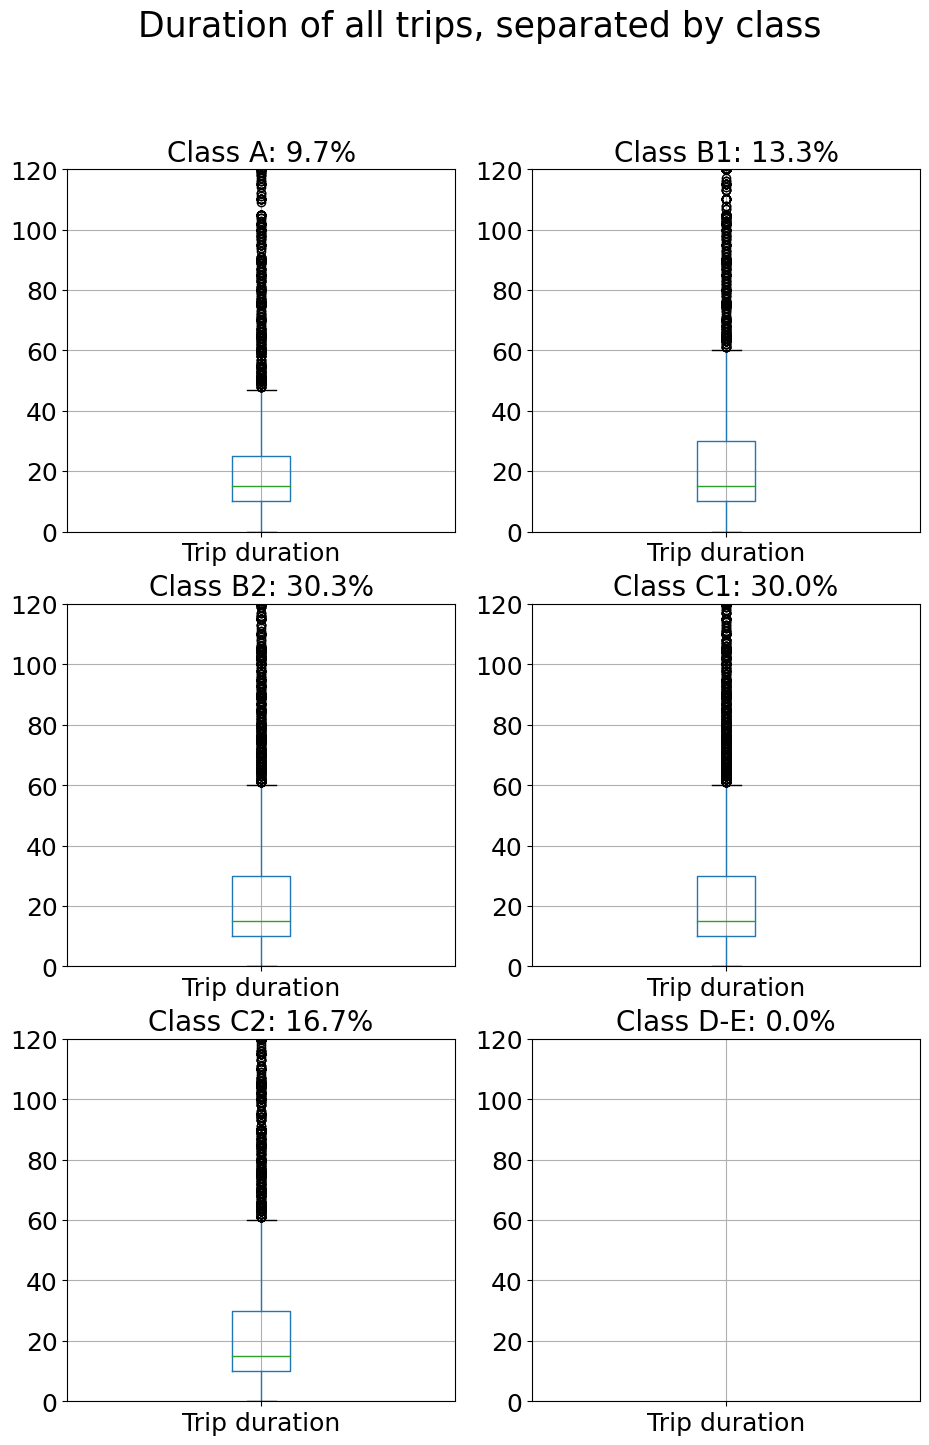

In [36]:
social_class_column = 'HHBestInkG'
tsa.plot_duration_separated_by_class(data, new_duration_column, social_class_column, classes_index_map, bike=False, save=True)

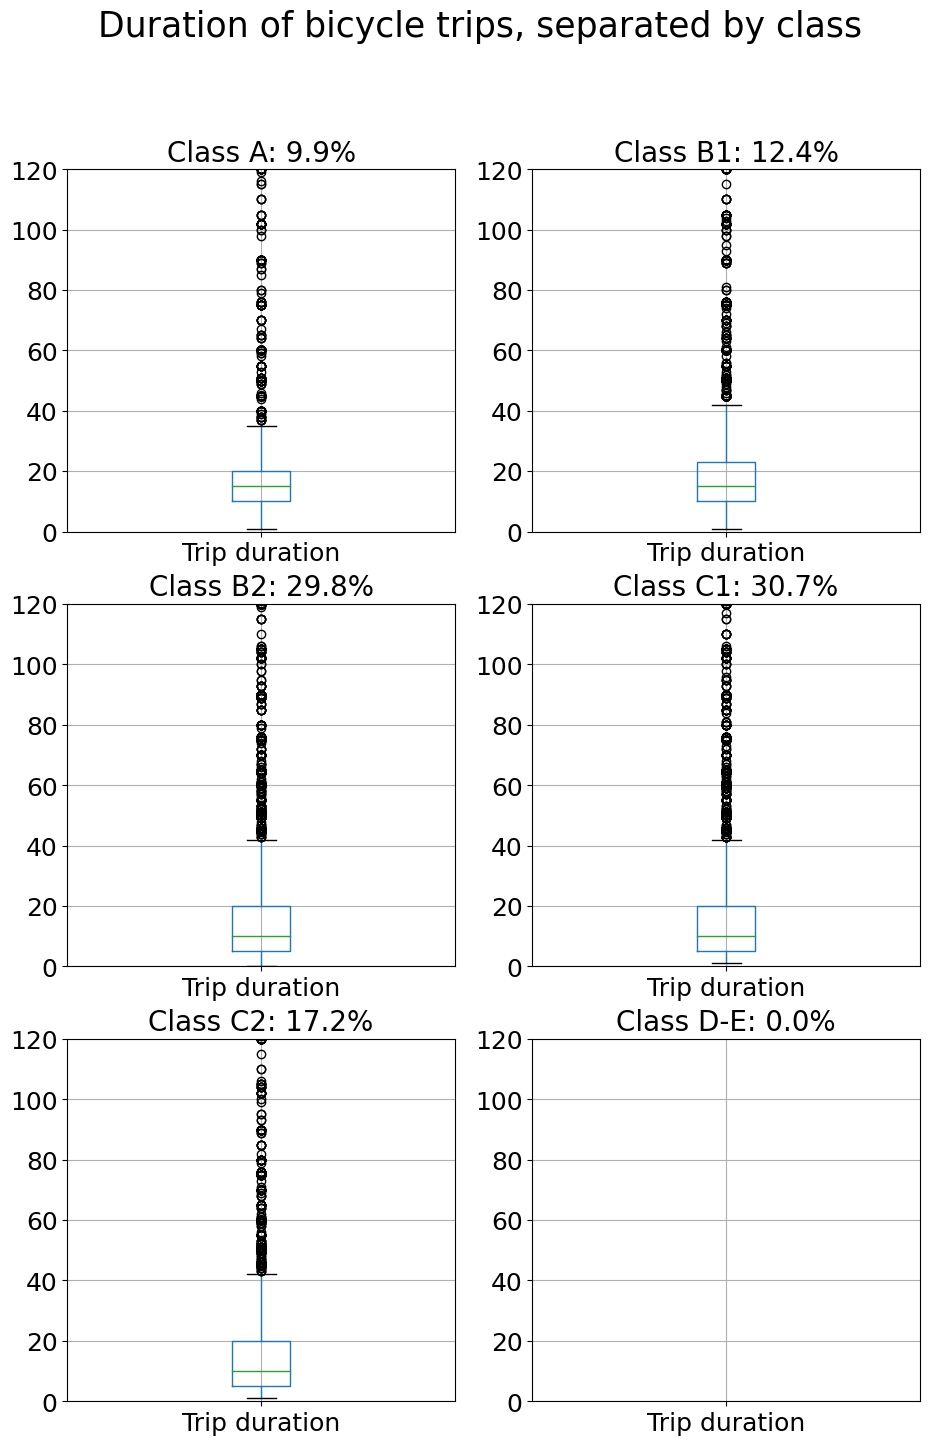

In [37]:
tsa.plot_duration_separated_by_class(bike_trips, new_duration_column, social_class_column, classes_index_map, bike=True, save=True)

In [38]:
data[new_duration_column].mean()

23.702153269343057

In [39]:
bike_trips[new_duration_column].mean()

20.071421569588487

Now, I want to calculate the distribution of each mode in each social class. However, I want the percentage of everything to sum up to 100%. That is, I want the percentage of people cycling in class A, for example, in relation to the entire population.

In [40]:
classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
new_variable_column = social_class_column + '_new'
data[new_variable_column] = data[social_class_column].map(classes_index_map)
tsa.calculate_distribution_separated_by_another_column(data, new_variable_column, classes_index_map,
                                                   mode_column, mode_index_map, normalize = False, save =True)

,Passenger car - driver,Passenger car - passenger,Train,Bus/tram/metro,Bicycle,On foot,Other
HHBestInkG_new,,,,,,,
A,1.824591,0.710640,1.121123,0.784921,2.585502,1.887370,0.421732
B1,3.791637,1.212415,0.815637,0.839384,3.245969,2.477624,0.504044
B2,9.924562,3.472035,1.857545,1.557762,7.761234,4.583626,1.192843
C1,10.441360,3.649579,2.176150,1.235095,8.015357,3.752876,1.219496
C2,6.073020,1.901712,1.261741,0.664740,4.475052,1.954650,0.606979
D-E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


I also want to generalize the function to make it calculate the percentage of each mode in each social class, and within each class, all the columns sum up to 100%.

In [41]:
classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
new_variable_column = social_class_column + '_new'
data[new_variable_column] = data[social_class_column].map(classes_index_map)
tsa.calculate_distribution_separated_by_another_column(data, new_variable_column, classes_index_map,
                                                   mode_column, mode_index_map, normalize = True, save = True)

,Passenger car - driver,Passenger car - passenger,Train,Bus/tram/metro,Bicycle,On foot,Other
HHBestInkG_new,,,,,,,
A,19.543856,7.611926,12.008754,8.407574,27.694255,20.216313,4.517322
B1,29.422851,9.408259,6.329287,6.513560,25.188503,19.226194,3.911345
B2,32.700793,11.440131,6.120490,5.132724,25.572766,15.102754,3.930342
C1,34.245292,11.969791,7.137279,4.050831,26.288555,12.308581,3.999671
C2,35.854632,11.227558,7.449223,3.924576,26.420356,11.540102,3.583554
D-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
